## 1) 변수간 상관관계

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic') 

In [ ]:
df = pd.read_excel('산일구비_최종_데이터셋.xlsx')
df = df.iloc[:, [0,6,16,17,18,19,20,21,22,23,24]]
df.head()

,자치구/동,종사자수,기초생활수급자 인원_비율,65세 이상 인구 수_비율,단장기 외국인 체류자 수_비율,우체국 수_비율,편의점 수_비율,약국 24시간_비율,ATM 수_비율,응급실 수_비율,은행 수_합계_비율
0,종로구 사직동,47522,0.013375,0.184655,0.112874,1.626016,24.390244,0.0,13.008130,0.000000,19.512195
1,종로구 삼청동,4601,0.014834,0.227207,0.085967,1.342282,4.697987,0.0,2.684564,0.000000,3.355705
2,종로구 부암동,3454,0.015225,0.181994,0.054414,0.440529,4.405286,0.0,2.202643,0.000000,0.881057
3,종로구 평창동,3447,0.007472,0.186518,0.029408,0.000000,1.691094,0.0,0.450958,0.000000,0.338219
4,종로구 무악동,1644,0.018599,0.167987,0.011421,0.000000,11.111111,0.0,5.555556,2.777778,5.555556


In [ ]:
df_corr = df.corr()
df_corr

,종사자수,기초생활수급자 인원_비율,65세 이상 인구 수_비율,단장기 외국인 체류자 수_비율,우체국 수_비율,편의점 수_비율,약국 24시간_비율,ATM 수_비율,응급실 수_비율,은행 수_합계_비율
종사자수,1.000000,-0.066892,-0.201123,0.324541,0.162271,0.390881,0.000947,0.448195,0.016682,0.535856
기초생활수급자 인원_비율,-0.066892,1.000000,0.282970,0.192604,-0.005029,-0.090007,-0.017179,-0.053465,-0.023801,-0.096017
65세 이상 인구 수_비율,-0.201123,0.282970,1.000000,0.007193,0.079377,-0.209614,0.006979,-0.058867,-0.005152,-0.179013
단장기 외국인 체류자 수_비율,0.324541,0.192604,0.007193,1.000000,0.195598,0.357006,0.088811,0.469834,0.213485,0.526788
우체국 수_비율,0.162271,-0.005029,0.079377,0.195598,1.000000,0.290153,0.040928,0.314614,0.041816,0.245114
편의점 수_비율,0.390881,-0.090007,-0.209614,0.357006,0.290153,1.000000,0.189542,0.535560,0.168361,0.674115
약국 24시간_비율,0.000947,-0.017179,0.006979,0.088811,0.040928,0.189542,1.000000,0.049698,0.195662,0.097339
ATM 수_비율,0.448195,-0.053465,-0.058867,0.469834,0.314614,0.535560,0.049698,1.000000,0.158746,0.617295
응급실 수_비율,0.016682,-0.023801,-0.005152,0.213485,0.041816,0.168361,0.195662,0.158746,1.000000,0.130753
은행 수_합계_비율,0.535856,-0.096017,-0.179013,0.526788,0.245114,0.674115,0.097339,0.617295,0.130753,1.000000


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


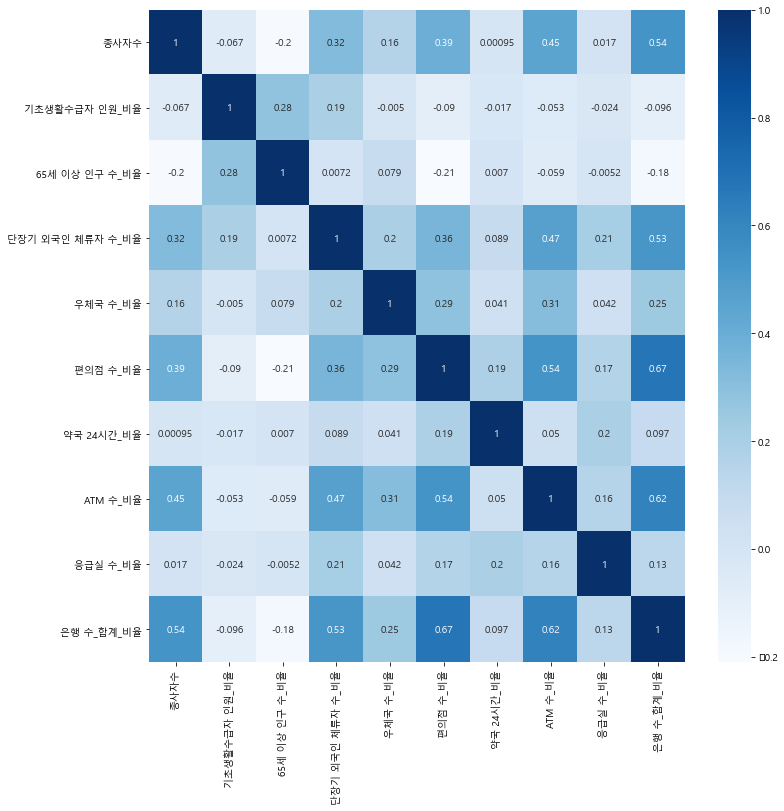

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(df_corr,cmap='Blues',annot=True)
plt.show()

## k_means 클러스터링

In [ ]:
# 필요한 모듈
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA
import sklearn
%matplotlib inline

In [ ]:
# 데이터셋
df = pd.read_excel('산일구비_최종_데이터셋.xlsx')
df1 = df.iloc[:, [16,17,19,22]]
df1

,기초생활수급자 인원_비율,65세 이상 인구 수_비율,우체국 수_비율,ATM 수_비율
0,0.013375,0.184655,1.626016,13.008130
1,0.014834,0.227207,1.342282,2.684564
2,0.015225,0.181994,0.440529,2.202643
3,0.007472,0.186518,0.000000,0.450958
4,0.018599,0.167987,0.000000,5.555556
...,...,...,...,...
419,0.018645,0.171841,0.000000,1.960784
420,0.015220,0.174306,0.636943,8.280255
421,0.041175,0.170891,0.460829,3.225806
422,0.060275,0.158318,0.357143,1.785714


## 1) MinMaxScaler

In [ ]:
# 정규화
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df1)

In [ ]:
df = pd.DataFrame(scaled)
df.columns=df1.columns
df.head()

,기초생활수급자 인원_비율,65세 이상 인구 수_비율,우체국 수_비율,ATM 수_비율
0,0.006860,0.461876,0.373984,0.238482
1,0.007621,0.647307,0.308725,0.049217
2,0.007825,0.450276,0.101322,0.040382
3,0.003780,0.469994,0.000000,0.008268
4,0.009584,0.389237,0.000000,0.101852


In [ ]:
# 군집 개수 결정
# Elbow method
inertia_arr=[]
k_range = range(2,15)
for k in k_range:
    Kmeans=KMeans(n_clusters=k,random_state=200)
    Kmeans.fit(df)
    inertia = Kmeans.inertia_
    print('k: ',k,'inertia:',inertia)
    inertia_arr.append(inertia)
inertia_arr=np.array(inertia_arr)

k:  2 inertia: 18.111934993318048
k:  3 inertia: 13.582505868756254
k:  4 inertia: 11.478630051335406
k:  5 inertia: 9.822783780797032
k:  6 inertia: 8.688565211239569
k:  7 inertia: 7.771472014244622
k:  8 inertia: 7.139391819359302
k:  9 inertia: 6.2498565200560545
k:  10 inertia: 5.846124607279963
k:  11 inertia: 5.390601867964262
k:  12 inertia: 4.872248062677171
k:  13 inertia: 4.43754689607258
k:  14 inertia: 4.087478898503998


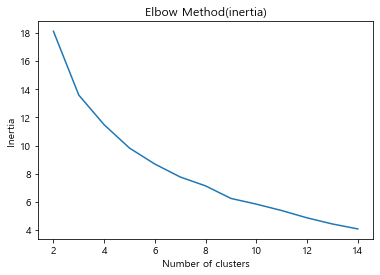

In [ ]:
plt.plot(k_range,inertia_arr)
plt.title('Elbow Method(inertia)')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

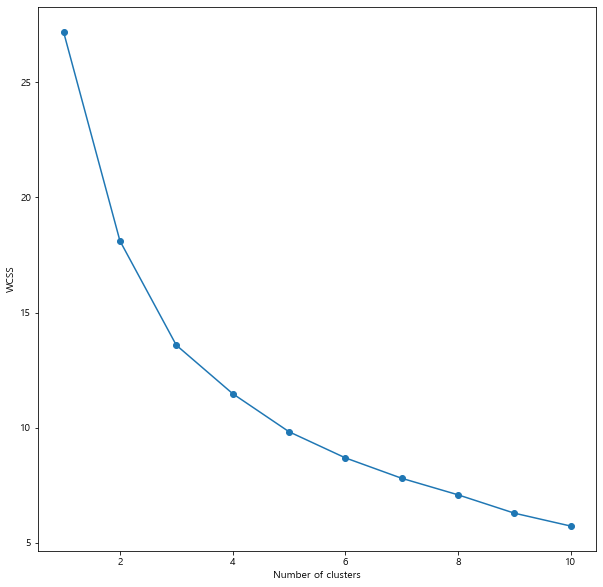

In [ ]:
# Elbow method2
wcss = []
for i in range(1,11):
    model = KMeans(n_clusters = i, init = "k-means++")
    model.fit(df)
    wcss.append(model.inertia_)
plt.figure(figsize=(10,10))
plt.plot(range(1,11), wcss, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
# Silhouette score
from sklearn.metrics import silhouette_score
k_range=range(2,15)
best_n=-1
best_silhouette_score = -1
silhouette_score_arr = []
for k in k_range:
    kmeans=KMeans(n_clusters=k, random_state=200)
    kmeans.fit(df)
    clusters=kmeans.predict(df)
    score=silhouette_score(df,clusters)
    print('k:',k,'score: ',score)
    silhouette_score_arr.append(score)

    if score> best_silhouette_score:
        best_n=k
        best_silhouette_score=score
        
print('best_n:',best_n,'best score:',best_silhouette_score)
silhouette_score_arr=np.array(silhouette_score_arr)

k: 2 score:  0.4176926899191667
k: 3 score:  0.3265827699920827
k: 4 score:  0.34327578123921426
k: 5 score:  0.3343130856926211
k: 6 score:  0.3355761678176695
k: 7 score:  0.32775531773584266
k: 8 score:  0.28760938148926013
k: 9 score:  0.331109508894169
k: 10 score:  0.3337909338595346
k: 11 score:  0.30454303508211045
k: 12 score:  0.2890435677769122
k: 13 score:  0.304401920084762
k: 14 score:  0.30412738958028673
best_n: 2 best score: 0.4176926899191667


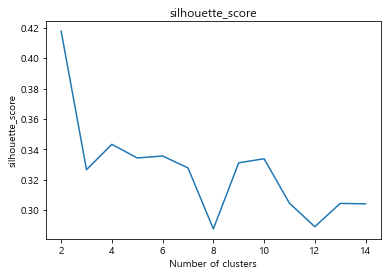

In [ ]:
plt.plot(k_range,silhouette_score_arr)
plt.title('silhouette_score')
plt.xlabel('Number of clusters')
plt.ylabel('silhouette_score')
plt.show()

In [ ]:
best_silhouette_score

0.4176926899191667

In [ ]:
# 차원축소
pca = PCA(2)
data = pca.fit_transform(df)

C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


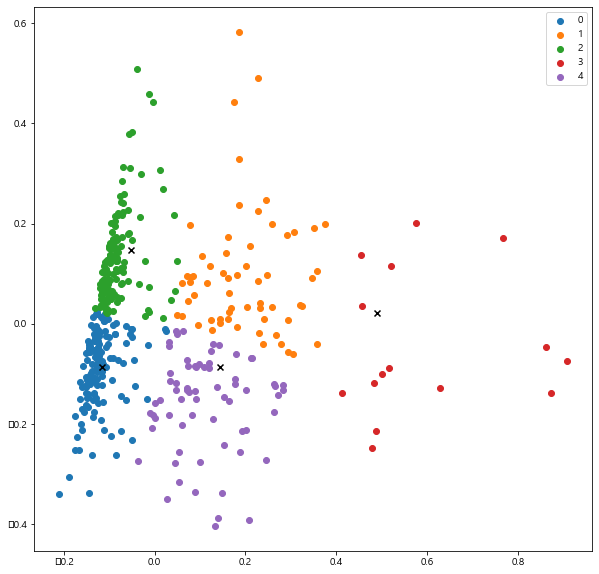

In [ ]:
# 군집화 결과
centers = np.array(model.cluster_centers_)
model = KMeans(n_clusters = 5, init = "k-means++")
label = model.fit_predict(data)
plt.figure(figsize=(10,10))
uniq = np.unique(label)
for i in uniq:
    plt.scatter(data[label == i , 0] , data[label == i , 1] , label = i)
plt.scatter(centers[:,0], centers[:,1], marker="x", color='k')
#This is done to find the centroid for each clusters.
plt.legend()
plt.show()

In [ ]:
model.inertia_

5.509835784117991

In [ ]:
cluster = pd.Series(label)

In [ ]:
cluster

0      1
1      1
2      2
3      2
4      2
      ..
419    2
420    1
421    2
422    0
423    4
Length: 424, dtype: int32

In [ ]:
df1['cluster'] = cluster
df1['cluster'].value_counts()

0    143
2    138
4     67
1     61
3     15
Name: cluster, dtype: int64

In [ ]:
df2 = pd.DataFrame(columns = df1.columns[:-1])
df2

,기초생활수급자 인원_비율,65세 이상 인구 수_비율,우체국 수_비율,ATM 수_비율


In [ ]:
c1=[]
c2=[]
c3=[]
c4=[]
# c5=[]

for i in range(5):    
    c1.append(df1[df1['cluster']==i]['기초생활수급자 인원_비율'].mean())
    c2.append(df1[df1['cluster']==i]['65세 이상 인구 수_비율'].mean())
    c3.append(df1[df1['cluster']==i]['우체국 수_비율'].mean())
    c4.append(df1[df1['cluster']==i]['ATM 수_비율'].mean())
#     c5.append(df1[df1['cluster']==i]['은행 수_합계_비율'].mean())

df2['기초생활수급자 인원_비율']=c1
df2['65세 이상 인구 수_비율']=c2
df2['우체국 수_비율']=c3
df2['ATM 수_비율']=c4
# df2['은행 수_합계_비율']=c5

In [ ]:
# 군집별 특징 파악
df2

,기초생활수급자 인원_비율,65세 이상 인구 수_비율,우체국 수_비율,ATM 수_비율
0,0.027289,0.141567,0.057813,5.044062
1,0.053842,0.197593,1.258149,6.029565
2,0.060977,0.192245,0.040995,4.285065
3,0.049658,0.187152,2.925914,16.214136
4,0.026193,0.136693,1.083565,7.992525


In [ ]:
data = pd.read_excel('산일구비_최종_데이터셋.xlsx')

df1['자치구/동'] = data['자치구/동']
df1.head()

,기초생활수급자 인원_비율,65세 이상 인구 수_비율,우체국 수_비율,ATM 수_비율,cluster,자치구/동
0,0.013375,0.184655,1.626016,13.008130,1,종로구 사직동
1,0.014834,0.227207,1.342282,2.684564,1,종로구 삼청동
2,0.015225,0.181994,0.440529,2.202643,2,종로구 부암동
3,0.007472,0.186518,0.000000,0.450958,2,종로구 평창동
4,0.018599,0.167987,0.000000,5.555556,2,종로구 무악동


In [ ]:
# 클러스터에 해당하는 행정동 출력
dong0 = []
dong1 = []
dong2 = []
dong3 = []
dong4 = []

data = pd.read_excel('산일구비_최종_데이터셋.xlsx')
for i in range(len(df1)):
    if df1.iloc[i]['cluster']==0:
        dong0.append(df1.iloc[i]['자치구/동'])
    elif df1.iloc[i]['cluster']==1:
        dong1.append(df1.iloc[i]['자치구/동'])
    elif df1.iloc[i]['cluster']==2:
        dong2.append(df1.iloc[i]['자치구/동'])
    elif df1.iloc[i]['cluster']==3:
        dong3.append(df1.iloc[i]['자치구/동'])
    else:
        dong4.append(df1.iloc[i]['자치구/동'])

In [ ]:
dong0

['종로구 교남동',
 '종로구 숭인2동',
 '중구 황학동',
 '용산구 효창동',
 '용산구 이촌1동',
 '용산구 서빙고동',
 '용산구 한남동',
 '성동구 왕십리2동',
 '성동구 행당2동',
 '성동구 응봉동',
 '성동구 금호4가동',
 '성동구 성수1가1동',
 '성동구 성수1가2동',
 '성동구 송정동',
 '성동구 옥수동',
 '광진구 군자동',
 '광진구 중곡1동',
 '광진구 능동',
 '광진구 구의2동',
 '광진구 광장동',
 '광진구 자양1동',
 '광진구 자양3동',
 '동대문구 회기동',
 '동대문구 휘경1동',
 '동대문구 휘경2동',
 '동대문구 장안2동',
 '동대문구 답십리1동',
 '중랑구 상봉2동',
 '성북구 돈암2동',
 '성북구 보문동',
 '성북구 길음1동',
 '성북구 길음2동',
 '성북구 장위1동',
 '성북구 장위3동',
 '성북구 동선동',
 '강북구 삼각산동',
 '도봉구 쌍문4동',
 '도봉구 창4동',
 '노원구 공릉2동',
 '노원구 하계1동',
 '노원구 하계2동',
 '노원구 중계1동',
 '노원구 상계2동',
 '노원구 상계8동',
 '노원구 상계9동',
 '은평구 응암2동',
 '은평구 진관동',
 '서대문구 남가좌1동',
 '서대문구 남가좌2동',
 '서대문구 북가좌1동',
 '서대문구 북아현동',
 '서대문구 연희동',
 '마포구 용강동',
 '마포구 대흥동',
 '마포구 염리동',
 '마포구 신수동',
 '마포구 합정동',
 '마포구 망원1동',
 '마포구 망원2동',
 '마포구 연남동',
 '마포구 성산2동',
 '마포구 상암동',
 '양천구 목1동',
 '양천구 목2동',
 '양천구 목4동',
 '양천구 신월5동',
 '양천구 신월6동',
 '양천구 신정2동',
 '양천구 신정3동',
 '양천구 신정6동',
 '양천구 목5동',
 '강서구 등촌1동',
 '강서구 등촌2동',
 '강서구 화곡2동',
 '강서구 화곡6동',
 '강서구 가양1동',
 '강서구 발산1동',
 '강서구 공항

In [ ]:
dong1

['종로구 사직동',
 '종로구 삼청동',
 '종로구 종로1.2.3.4가동',
 '종로구 종로5.6가동',
 '용산구 후암동',
 '용산구 이태원2동',
 '용산구 보광동',
 '성동구 마장동',
 '성동구 성수2가3동',
 '성동구 금호2.3가동',
 '동대문구 전농1동',
 '중랑구 중화1동',
 '중랑구 묵2동',
 '중랑구 신내2동',
 '성북구 정릉2동',
 '성북구 월곡1동',
 '성북구 월곡2동',
 '성북구 장위2동',
 '강북구 번2동',
 '강북구 번3동',
 '강북구 수유2동',
 '강북구 수유3동',
 '강북구 삼양동',
 '강북구 송중동',
 '강북구 송천동',
 '도봉구 쌍문2동',
 '도봉구 쌍문3동',
 '도봉구 방학1동',
 '도봉구 창5동',
 '도봉구 도봉2동',
 '노원구 월계3동',
 '노원구 중계2.3동',
 '노원구 공릉1동',
 '은평구 갈현2동',
 '은평구 대조동',
 '은평구 수색동',
 '은평구 불광2동',
 '은평구 응암3동',
 '서대문구 홍제1동',
 '서대문구 북가좌2동',
 '마포구 도화동',
 '양천구 신월2동',
 '양천구 신월3동',
 '강서구 화곡4동',
 '강서구 가양2동',
 '구로구 고척1동',
 '구로구 오류1동',
 '금천구 독산4동',
 '금천구 시흥1동',
 '영등포구 신길5동',
 '영등포구 대림2동',
 '관악구 은천동',
 '관악구 성현동',
 '관악구 미성동',
 '강남구 일원1동',
 '강남구 일원2동',
 '강남구 수서동',
 '송파구 풍납1동',
 '송파구 거여1동',
 '송파구 마천1동',
 '강동구 천호2동']

In [ ]:
# 약자 비율은 높고 현금접근성 비율은 낮은 곳
dong2

['종로구 부암동',
 '종로구 평창동',
 '종로구 무악동',
 '종로구 가회동',
 '종로구 창신1동',
 '종로구 창신2동',
 '종로구 창신3동',
 '종로구 청운효자동',
 '중구 필동',
 '중구 광희동',
 '중구 신당5동',
 '중구 중림동',
 '중구 다산동',
 '중구 청구동',
 '중구 동화동',
 '용산구 용산2가동',
 '용산구 남영동',
 '용산구 용문동',
 '용산구 이촌2동',
 '용산구 이태원1동',
 '성동구 금호1가동',
 '성동구 성수2가1동',
 '성동구 용답동',
 '광진구 중곡3동',
 '광진구 중곡4동',
 '광진구 자양4동',
 '동대문구 청량리동',
 '동대문구 제기동',
 '동대문구 전농2동',
 '동대문구 답십리2동',
 '동대문구 이문2동',
 '중랑구 면목2동',
 '중랑구 면목4동',
 '중랑구 면목7동',
 '중랑구 중화2동',
 '중랑구 묵1동',
 '중랑구 망우3동',
 '중랑구 신내1동',
 '중랑구 면목본동',
 '중랑구 면목3.8동',
 '중랑구 망우본동',
 '성북구 돈암1동',
 '성북구 정릉1동',
 '성북구 정릉3동',
 '성북구 정릉4동',
 '성북구 성북동',
 '성북구 석관동',
 '강북구 번1동',
 '강북구 수유1동',
 '강북구 미아동',
 '강북구 우이동',
 '강북구 인수동',
 '도봉구 쌍문1동',
 '도봉구 방학2동',
 '도봉구 방학3동',
 '도봉구 창1동',
 '도봉구 창2동',
 '도봉구 창3동',
 '도봉구 도봉1동',
 '노원구 월계1동',
 '노원구 월계2동',
 '노원구 중계4동',
 '노원구 상계1동',
 '노원구 상계5동',
 '노원구 상계3.4동',
 '은평구 녹번동',
 '은평구 불광1동',
 '은평구 갈현1동',
 '은평구 구산동',
 '은평구 신사1동',
 '은평구 신사2동',
 '은평구 증산동',
 '은평구 역촌동',
 '서대문구 천연동',
 '서대문구 홍제3동',
 '서대문구 홍제2동',
 '서대문구 홍은1동',
 '서대문구 홍은2동',
 '

In [ ]:
dong3

['종로구 이화동',
 '종로구 숭인1동',
 '중구 회현동',
 '중구 명동',
 '중구 을지로동',
 '중구 신당동',
 '중구 약수동',
 '용산구 원효로2동',
 '동대문구 용신동',
 '성북구 삼선동',
 '서대문구 충현동',
 '마포구 성산1동',
 '양천구 신정1동',
 '강서구 등촌3동',
 '구로구 구로4동']

In [ ]:
dong4

['종로구 혜화동',
 '중구 소공동',
 '중구 장충동',
 '용산구 청파동',
 '용산구 원효로1동',
 '용산구 한강로동',
 '성동구 사근동',
 '성동구 행당1동',
 '성동구 왕십리도선동',
 '광진구 화양동',
 '광진구 중곡2동',
 '광진구 구의1동',
 '광진구 구의3동',
 '광진구 자양2동',
 '동대문구 장안1동',
 '동대문구 이문1동',
 '중랑구 면목5동',
 '중랑구 상봉1동',
 '성북구 안암동',
 '성북구 종암동',
 '노원구 중계본동',
 '노원구 상계10동',
 '노원구 상계6.7동',
 '은평구 응암1동',
 '서대문구 신촌동',
 '마포구 서교동',
 '마포구 서강동',
 '마포구 공덕동',
 '마포구 아현동',
 '양천구 목3동',
 '강서구 염창동',
 '강서구 화곡본동',
 '구로구 신도림동',
 '구로구 구로1동',
 '구로구 구로3동',
 '금천구 가산동',
 '영등포구 당산1동',
 '영등포구 신길7동',
 '영등포구 영등포동',
 '영등포구 문래동',
 '동작구 상도2동',
 '동작구 사당1동',
 '동작구 신대방2동',
 '관악구 행운동',
 '관악구 신림동',
 '서초구 서초1동',
 '서초구 서초3동',
 '서초구 반포본동',
 '서초구 반포2동',
 '서초구 방배본동',
 '강남구 논현2동',
 '강남구 삼성1동',
 '강남구 삼성2동',
 '강남구 역삼1동',
 '강남구 역삼2동',
 '강남구 개포2동',
 '송파구 방이2동',
 '송파구 오금동',
 '송파구 송파1동',
 '송파구 삼전동',
 '송파구 가락본동',
 '송파구 문정2동',
 '송파구 잠실6동',
 '강동구 명일1동',
 '강동구 성내1동',
 '강동구 성내3동',
 '강동구 상일동']

## 2) StandardScaler

In [ ]:
df = pd.read_excel('산일구비_최종_데이터셋.xlsx')
df1 = df.iloc[:, [16,17,19,22,24]]

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()   
scaled = scaler.fit_transform(df1)

In [ ]:
df = pd.DataFrame(scaled)
df.columns=df1.columns
df.head()

,기초생활수급자 인원_비율,65세 이상 인구 수_비율,우체국 수_비율,ATM 수_비율,은행 수_합계_비율
0,-0.307798,0.512875,1.525827,1.344888,2.872865
1,-0.292482,1.746470,1.145207,-0.581247,-0.303606
2,-0.288369,0.435709,-0.064463,-0.671162,-0.790138
3,-0.369775,0.566886,-0.655417,-0.997986,-0.896864
4,-0.252954,0.029641,-0.655417,-0.045588,0.128899


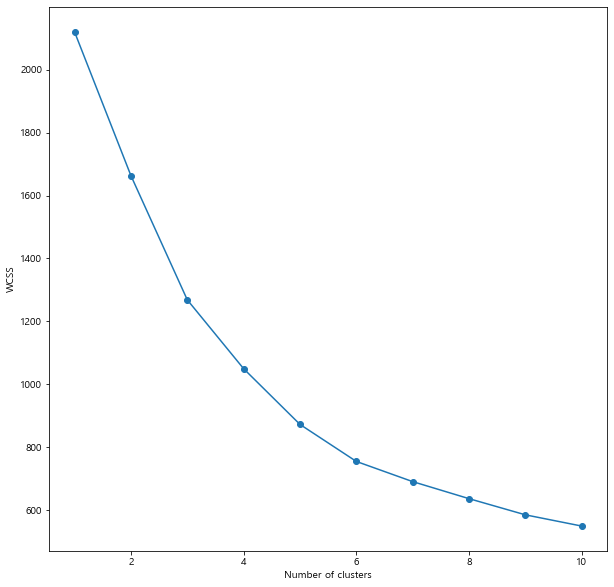

In [ ]:
wcss = []
for i in range(1,11):
    model = KMeans(n_clusters = i, init = "k-means++")
    model.fit(df)
    wcss.append(model.inertia_)
plt.figure(figsize=(10,10))
plt.plot(range(1,11), wcss, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
pca = PCA(2)
data = pca.fit_transform(df)

C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


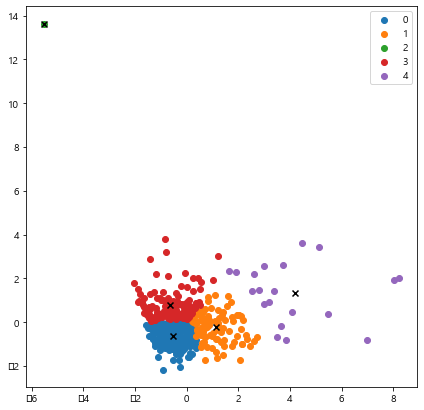

In [ ]:
centers = np.array(model.cluster_centers_)
model = KMeans(n_clusters = 5, init = "k-means++")
label = model.fit_predict(data)
plt.figure(figsize=(7,7))
uniq = np.unique(label)
for i in uniq:
    plt.scatter(data[label == i , 0] , data[label == i , 1] , label = i)
plt.scatter(centers[:,0], centers[:,1], marker="x", color='k')
#This is done to find the centroid for each clusters.
plt.legend()
plt.show()

In [ ]:
model.inertia_

373.19534089839175

## 3) RobustScaler

In [ ]:
df = pd.read_excel('산일구비_최종_데이터셋.xlsx')
df1 = df.iloc[:, [16,17,19,22,24]]

In [ ]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
scaled = scaler.fit_transform(df1)

In [ ]:
df = pd.DataFrame(scaled)
df.columns=df1.columns
df.head()

,기초생활수급자 인원_비율,65세 이상 인구 수_비율,우체국 수_비율,ATM 수_비율,은행 수_합계_비율
0,-0.687654,0.411536,1.817046,1.696156,3.132706
1,-0.637981,1.355693,1.499977,-0.352536,-0.055381
2,-0.624641,0.352476,0.492283,-0.448172,-0.543692
3,-0.888668,0.452875,0.000000,-0.795791,-0.650808
4,-0.509778,0.041683,0.000000,0.217207,0.378705


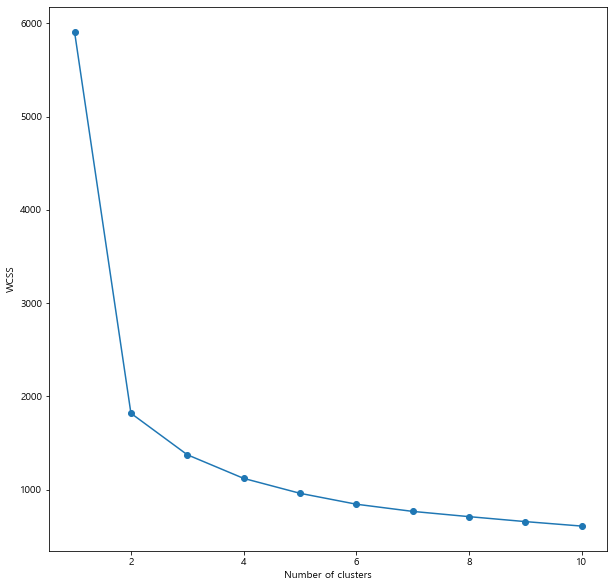

In [ ]:
wcss = []
for i in range(1,11):
    model = KMeans(n_clusters = i, init = "k-means++")
    model.fit(df)
    wcss.append(model.inertia_)
plt.figure(figsize=(10,10))
plt.plot(range(1,11), wcss, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
pca = PCA(2)
data = pca.fit_transform(df)

C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


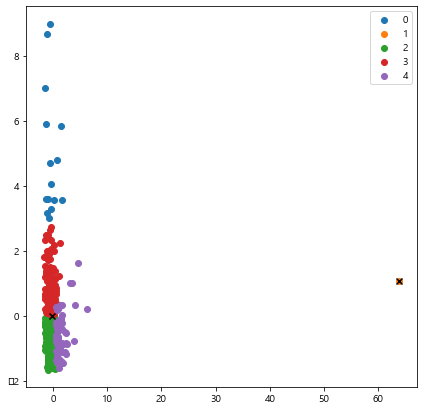

In [ ]:
centers = np.array(model.cluster_centers_)
model = KMeans(n_clusters = 5, init = "k-means++")
label = model.fit_predict(data)
plt.figure(figsize=(7,7))
uniq = np.unique(label)
for i in uniq:
    plt.scatter(data[label == i , 0] , data[label == i , 1] , label = i)
plt.scatter(centers[:,0], centers[:,1], marker="x", color='k')
#This is done to find the centroid for each clusters.
plt.legend()
plt.show()

In [ ]:
model.inertia_

371.55835479194866

## 4) MaxAbsScaler

In [ ]:
df = pd.read_excel('산일구비_최종_데이터셋.xlsx')
df1 = df.iloc[:, [16,17,19,22,24]]

In [ ]:
from sklearn.preprocessing import MaxAbsScaler
scaler = MaxAbsScaler()
scaled = scaler.fit_transform(df1)

In [ ]:
df = pd.DataFrame(scaled)
df.columns=df1.columns
df.head()

,기초생활수급자 인원_비율,65세 이상 인구 수_비율,우체국 수_비율,ATM 수_비율,은행 수_합계_비율
0,0.006976,0.599256,0.373984,0.238482,0.419936
1,0.007737,0.737348,0.308725,0.049217,0.072221
2,0.007941,0.590618,0.101322,0.040382,0.018962
3,0.003897,0.605302,0.000000,0.008268,0.007279
4,0.009701,0.545162,0.000000,0.101852,0.119565


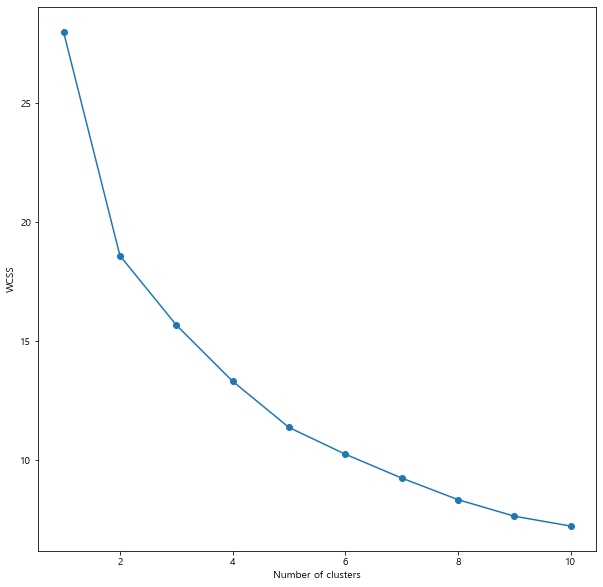

In [ ]:
wcss = []
for i in range(1,11):
    model = KMeans(n_clusters = i, init = "k-means++")
    model.fit(df)
    wcss.append(model.inertia_)
plt.figure(figsize=(10,10))
plt.plot(range(1,11), wcss, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


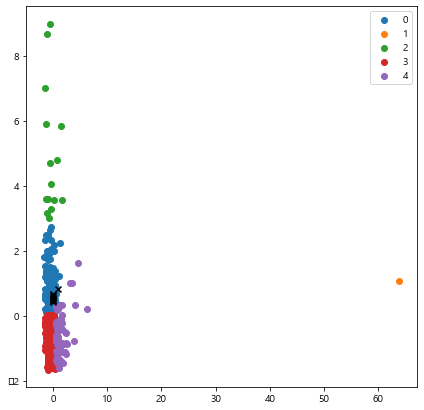

In [ ]:
centers = np.array(model.cluster_centers_)
model = KMeans(n_clusters = 5, init = "k-means++")
label = model.fit_predict(data)
plt.figure(figsize=(7,7))
uniq = np.unique(label)
for i in uniq:
    plt.scatter(data[label == i , 0] , data[label == i , 1] , label = i)
plt.scatter(centers[:,0], centers[:,1], marker="x", color='k')
#This is done to find the centroid for each clusters.
plt.legend()
plt.show()

In [ ]:
model.inertia_

371.8546813270207